### SUPERNOVA
### Firecrown-PLOT Demo Notebook
#### Ayan Mitra
##### AUG, 2022

#### In this notebook we demonstrate how the chains produced by `Cosmosis` using SN likelihood from `Firecrown` are analysed and plotted. We will show the result from our currently completed run of SNANA simulations, where we produced Hubble diagrams and covariance matrices, using PLaSTiCC simulation inputs. In this notebook we analyse a complete spectroscopic SN sample's results. In the `Cosmosis` run we sampled $\rm SN+CMB+BAO$. We also compared the corresponding `WFIT` fast minimizer's results for the same input. But in `WFIT` only $\rm CMB$ prior is used, which is approximated with a `R` shift parameter (Eq.69, Komatsu et.al 2009), tuned to match the same constraining power as Planck (2020) [1807.06209].  

In [118]:
!pwd

/global/u1/a/ayanmitr/soft/firecrown/examples/srd_sn


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from cosmosis.postprocess import parser
from cosmosis.postprocessing.inputs import read_input
from cosmosis.postprocessing.postprocess import postprocessor_for_sampler
from cosmosis.postprocessing.plots import MetropolisHastingsPlots2D, MetropolisHastingsPlots1D
import os
import csv
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
def convert(lst):
    return (lst[0].split())

In [3]:
parser.print_usage()

usage: ipykernel_launcher.py [-h] [--burn BURN] [--thin THIN] [--weights]
                             [-gd] [-o OUTDIR] [-p PREFIX]
                             [--more-latex MORE_LATEX] [--no-latex]
                             [--blind-add] [--blind-mul] [--pdb] [--text]
                             [--derive DERIVE] [--legend LEGEND]
                             [--legend-loc LEGEND_LOC] [--swap]
                             [--only PREFIX_ONLY] [--either PREFIX_EITHER]
                             [--no-plots] [--no-2d] [--no-alpha]
                             [-f FILE_TYPE] [--no-smooth] [--fix-edges]
                             [--n-kde N_KDE] [--factor-kde FACTOR_KDE]
                             [--no-fill] [--extra EXTRA] [--tweaks TWEAKS]
                             [--no-image] [--run-max-post RUN_MAX_POST]
                             inifile [inifile ...]


##### Below, the input files are produced in `CosmoMC` format. This file can be also read into `getDist` and similar analysis cab be performed. However one might face issues with the last two columns: `prior` and `post` which are not produced in correct order by `Cosmosis` and might need checking. Alternatively one can produce output file in `text` format, which can be readily analysed with `cosmosis-postprocess` command.

In [36]:
Burnin = 50000
path = '/global/cscratch1/sd/ayanmitr/firecrown/examples/srd_sn/'
sampler, ini = read_input(path+"sn_srd_planck_bao.ini")
os.makedirs(path, exist_ok=True)
proc = postprocessor_for_sampler(sampler)(ini, "sn_srd_planck_bao", 0, burn=Burnin, no_2d=False)
#---------------------------------------------------
# Printintg out the parameter list
with open(path+'output/sn_srd_planck_bao.txt') as f:
    reader = csv.reader(f)
    row1 = next(reader)  # gets the first line
row1 = [word.replace('\t','  ') for word in row1]
row1 = [word.replace('#','  ') for word in row1]  
#print('\n\n',row1)
row1 = convert(row1)
print('Parameter List:')

LOADING CHAIN FROM FILE:  /global/cscratch1/sd/ayanmitr/firecrown/examples/srd_sn/output/sn_srd_planck_bao.txt
Parameter List:


In [37]:
row1

['cosmological_parameters--ombh2',
 'cosmological_parameters--omega_m',
 'cosmological_parameters--h0',
 'cosmological_parameters--w',
 'cosmological_parameters--wa',
 'cosmological_parameters--tau',
 'cosmological_parameters--n_s',
 'cosmological_parameters--log1e10as',
 'firecrown_supernova_parameters--m',
 'prior',
 'post']

In [38]:
np.shape(proc.data)

(1, 126720, 11)

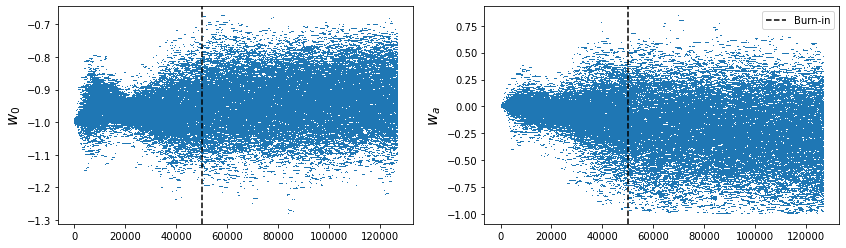

In [39]:
plt.rcParams['figure.figsize'] = [14,4] 
plt.subplot(1,2,1)
plt.plot(proc.data[0][:,3], ',')
plt.axvline(Burnin,linestyle='--',c='black') # check that the burn-in above is enough
plt.ylabel('$w_0$',fontsize=15)
plt.subplot(1,2,2)
plt.plot(proc.data[0][:,4], ',')
plt.axvline(Burnin,linestyle='--',c='black',label='Burn-in') # check that the burn-in above is enough
plt.ylabel('$w_a$',fontsize=15)
plt.legend()

In [70]:
wfit = [-0.94120,0.08915,-0.30467,0.41419] # w0, sig_w0,wa,sig_wa. Copied from WFIT output files in RCC.

### Custom Plotting

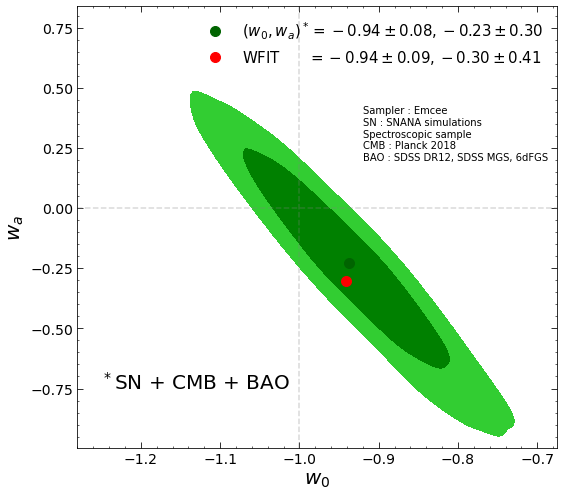

In [106]:
#%%timeit
plt.rcParams['figure.figsize'] = [8,7] 
txt='SN + CMB + BAO'
fig, ax = plt.subplots()
plotter = MetropolisHastingsPlots2D(proc)
x = plotter.reduced_col("cosmological_parameters--w") # w0
y = plotter.reduced_col("cosmological_parameters--wa")# wa
xax, yax, like = plotter.smooth_likelihood(x, y, "cosmological_parameters--wa",  "cosmological_parameters--w")
level1, level2,l3  = plotter._find_contours(like, x, y, xax, yax, 1 - 0.68, 1 - 0.95)
w0m  =  np.mean(x);w0std=  np.std(x);
wam  =  np.mean(y);wastd=  np.std(y);
ax.contourf(xax, yax, like.T, [level2,level1],colors=['white', 'limegreen','green'], extend='both')
ax.plot(np.mean(x),np.mean(y),'o',c='darkgreen',markersize=10,label=r'$(w_0 ,w_a)^*= %.2f\pm %.2f,%.2f \pm %.2f$'%(w0m,w0std,wam,wastd))
ax.plot(wfit[0],wfit[2],'o',c='r',markersize=10,label=r'WFIT      $ = %.2f\pm %.2f,%.2f \pm %.2f$'%(wfit[0],wfit[1],wfit[2],wfit[3]))
ax.set_xlabel(r'$w_0$',fontsize=20)
ax.set_ylabel(r'$w_a$',fontsize=20)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.minorticks_on()
ax.tick_params(which = 'both',direction="in")
ax.tick_params(length=6)
plt.legend(loc = 'upper right',prop={'size': 15},frameon=False)
plt.text(-1.25,-0.75,"$^*$%s"%txt,fontsize=20,color='black')
plt.text(-0.92,0.2,'Sampler : Emcee \nSN : SNANA simulations \nSpectroscopic sample\nCMB : Planck 2018 \nBAO : SDSS DR12, SDSS MGS, 6dFGS',fontsize=10)
plt.yticks(fontsize=14);plt.xticks(fontsize=14)
plt.axhline(0, linestyle = '--',color='grey',alpha = 0.3)
plt.axvline(-1, linestyle = '--',color='grey',alpha=0.3)
plt.tight_layout()
plt.savefig(path+'output/2D.pdf',bbox_inches='tight')

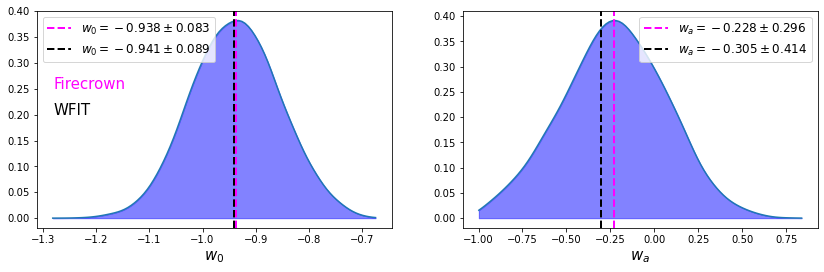

In [104]:
plt.rcParams['figure.figsize'] = [14,4] 

plotter = MetropolisHastingsPlots1D(proc)
y1, L1 = plotter.smooth_likelihood(x, "cosmological_parameters--w")
y2, L2 = plotter.smooth_likelihood(y, "cosmological_parameters--wa")

plt.subplot(1,2,1)
plt.plot(y1, L1)
plt.fill_between(y1,L1,color='b',alpha=0.49)
plt.xlabel("$w_0$",fontsize=15)
#plt.ylabel("Likelihood",fontsize=15)
plt.axvline(w0m,linestyle = '--',linewidth=2,c='magenta',label=r'$w_0 = %.3f \pm %.3f$'%(w0m,w0std))
plt.axvline(wfit[0],linestyle = '--',linewidth=2,c='black',label=r'$w_0 = %.3f \pm %.3f$'%(wfit[0],wfit[1]))
plt.legend(loc='best',fontsize=12)
plt.text(-1.28,0.25,'Firecrown',c='magenta',fontsize=15)
plt.text(-1.28,0.2,'WFIT',c='black',fontsize=15)
plt.subplot(1,2,2)
plt.plot(y2, L2)
plt.fill_between(y2,L2,color='b',alpha=0.49)
plt.xlabel("$w_a$",fontsize=15)
#plt.ylabel("Likelihood",fontsize=15)
plt.axvline(wam,linestyle = '--',linewidth=2,c='magenta',label=r'$w_a = %.3f \pm %.3f$'%(wam,wastd))
plt.axvline(wfit[2],linestyle = '--',linewidth=2,c='black',label=r'$w_a = %.3f \pm %.3f$'%(wfit[2],wfit[3]))
plt.legend(loc='best',fontsize=12)

##### The difference between $\rm Firecrown$ and $\rm WFIT$ results for $w_a$, are due to the different priors used.

### Alternately, Cosmosis inbuilt command can be used to produce the entire list of plots, both: 1D and 2D and the computed statistics. Shown below

<class 'cosmosis.postprocessing.plots.MetropolisHastingsPlots1D'>
<class 'cosmosis.postprocessing.plots.MetropolisHastingsPlots2D'>
<class 'cosmosis.postprocessing.statistics.MetropolisHastingsStatistics'>
<class 'cosmosis.postprocessing.statistics.MetropolisHastingsCovariance'>
<class 'cosmosis.postprocessing.statistics.Citations'>
 - 1D plot  cosmological_parameters--ombh2
 - 1D plot  cosmological_parameters--omega_m
 - 1D plot  cosmological_parameters--h0
 - 1D plot  cosmological_parameters--w
 - 1D plot  cosmological_parameters--wa
 - 1D plot  cosmological_parameters--tau
 - 1D plot  cosmological_parameters--n_s
 - 1D plot  cosmological_parameters--log1e10as
 - 1D plot  firecrown_supernova_parameters--m
(Making 2D plots using KDE; this takes a while but is really cool)
  (making cosmological_parameters--ombh2 vs cosmological_parameters--h0)
  (making cosmological_parameters--ombh2 vs cosmological_parameters--n_s)
  (making cosmological_parameters--ombh2 vs cosmological_parameters--

['./cosmological_parameters--ombh2.png',
 './cosmological_parameters--omega_m.png',
 './cosmological_parameters--h0.png',
 './cosmological_parameters--w.png',
 './cosmological_parameters--wa.png',
 './cosmological_parameters--tau.png',
 './cosmological_parameters--n_s.png',
 './cosmological_parameters--log1e10as.png',
 './firecrown_supernova_parameters--m.png',
 './2D_cosmological_parameters--ombh2_cosmological_parameters--h0.png',
 './2D_cosmological_parameters--ombh2_cosmological_parameters--n_s.png',
 './2D_cosmological_parameters--ombh2_cosmological_parameters--log1e10as.png',
 './2D_cosmological_parameters--omega_m_cosmological_parameters--ombh2.png',
 './2D_cosmological_parameters--omega_m_cosmological_parameters--h0.png',
 './2D_cosmological_parameters--omega_m_cosmological_parameters--n_s.png',
 './2D_cosmological_parameters--omega_m_cosmological_parameters--log1e10as.png',
 './2D_cosmological_parameters--w_cosmological_parameters--ombh2.png',
 './2D_cosmological_parameters--w_

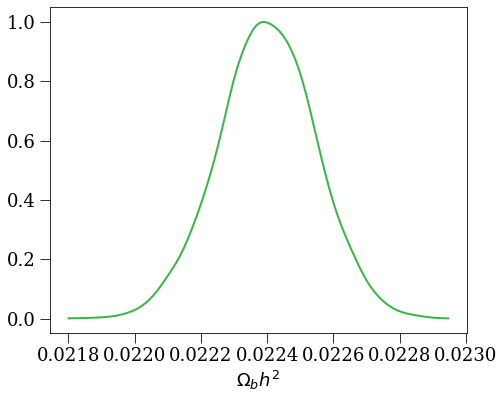

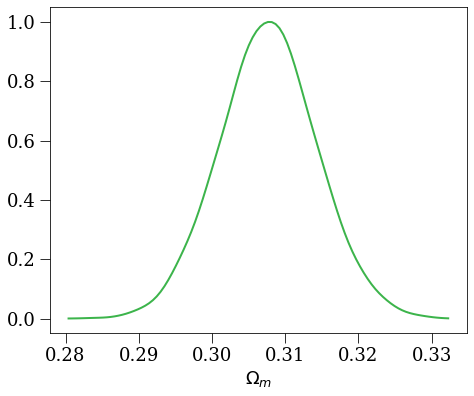

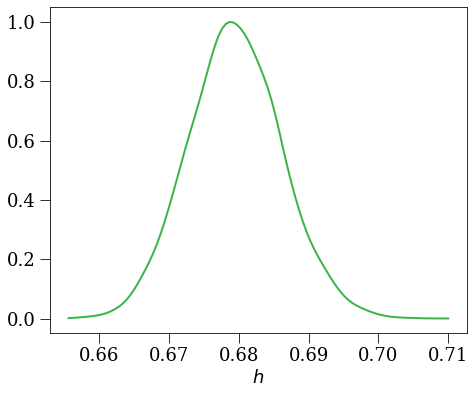

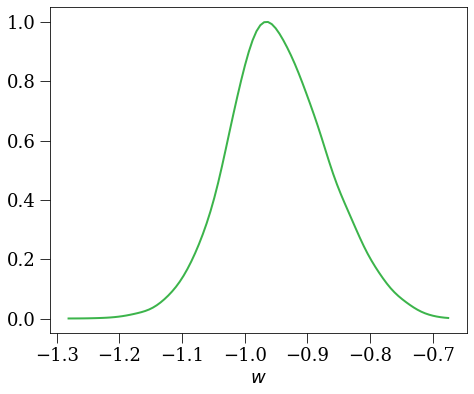

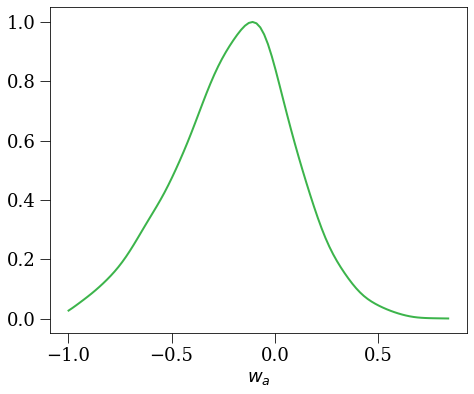

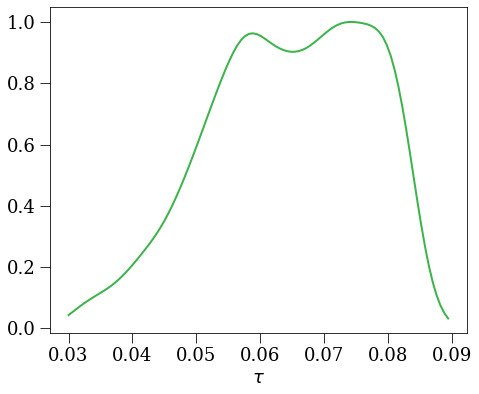

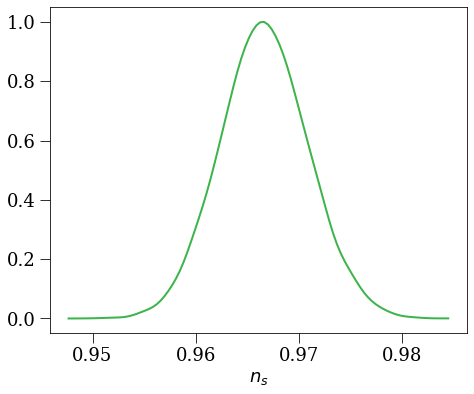

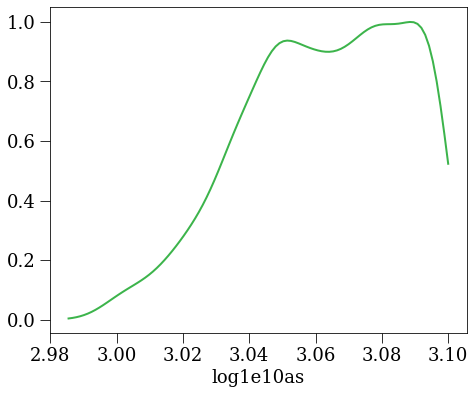

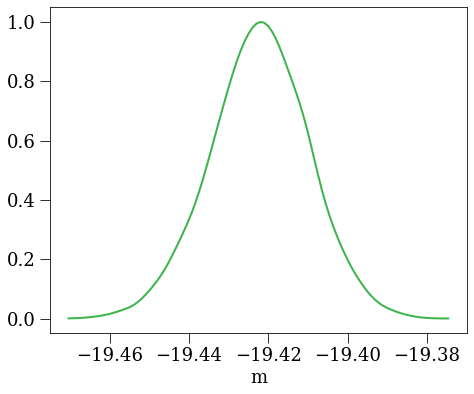

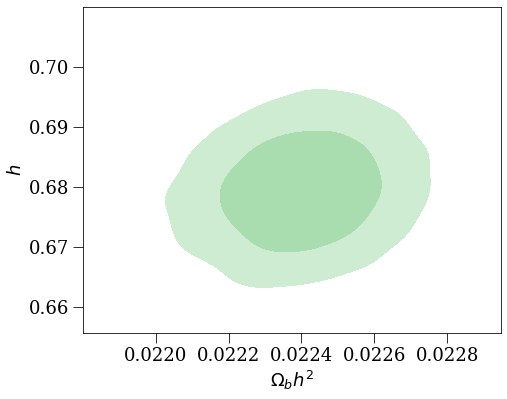

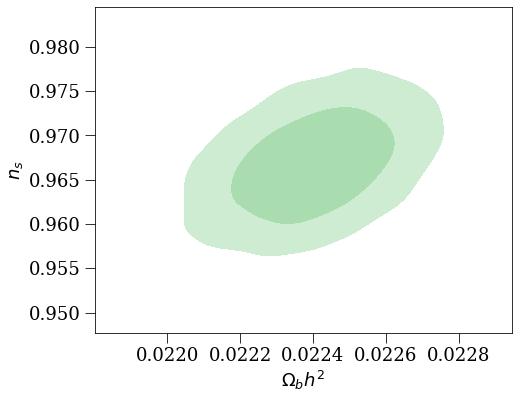

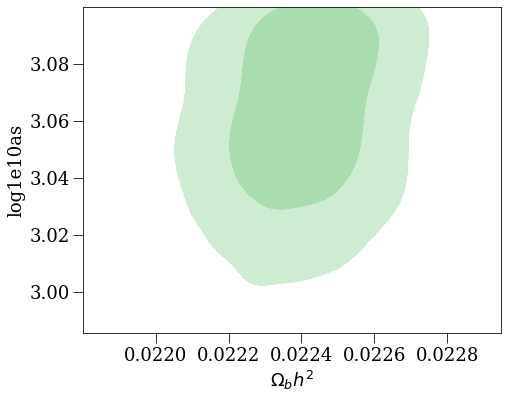

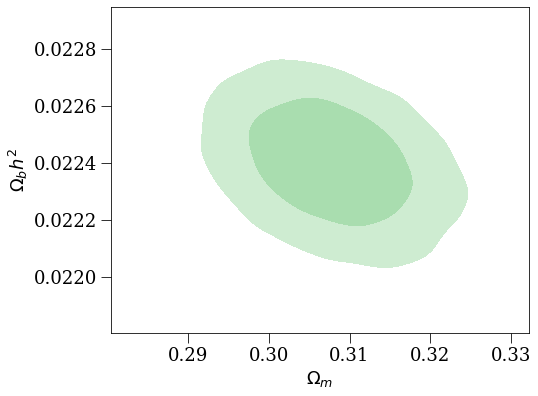

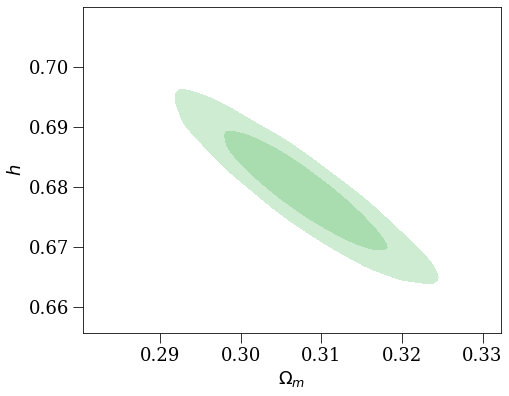

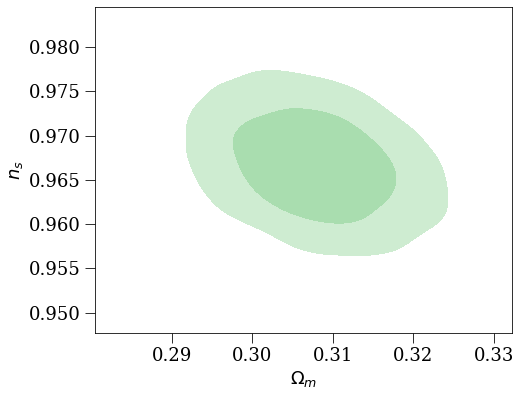

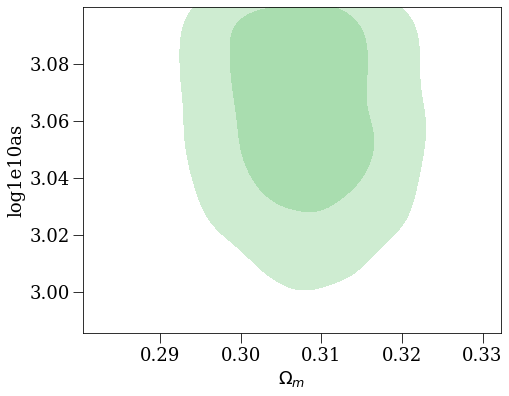

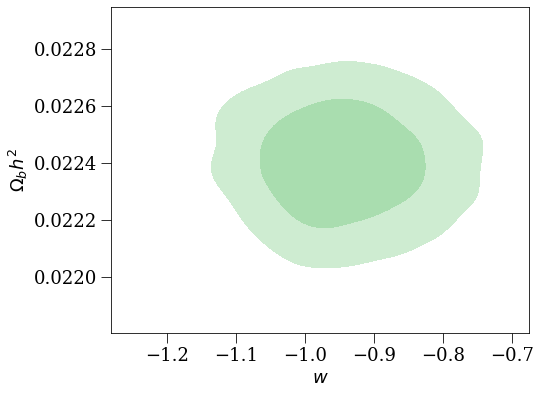

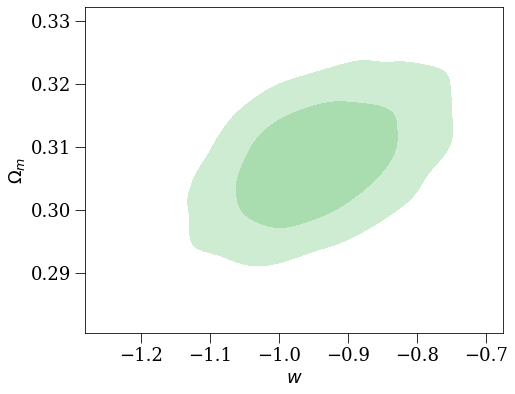

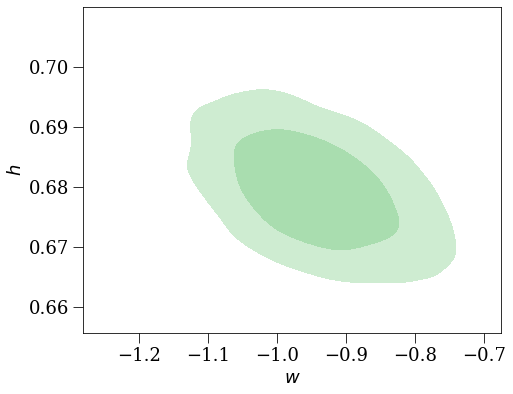

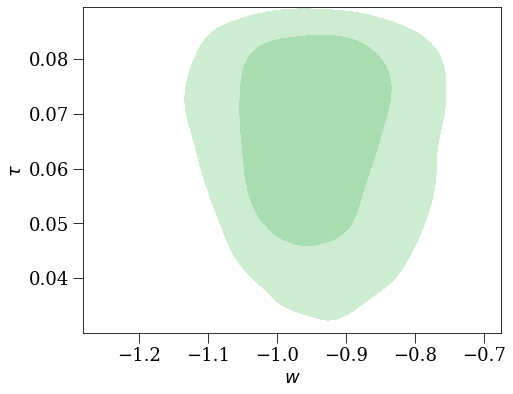

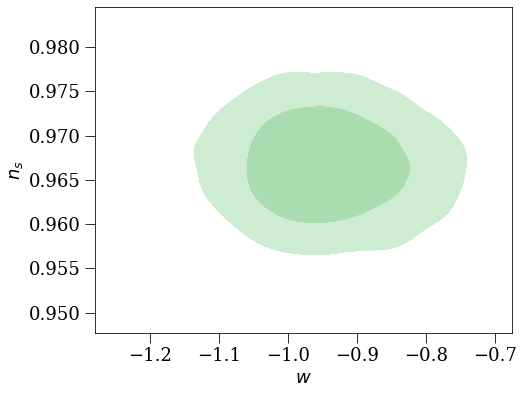

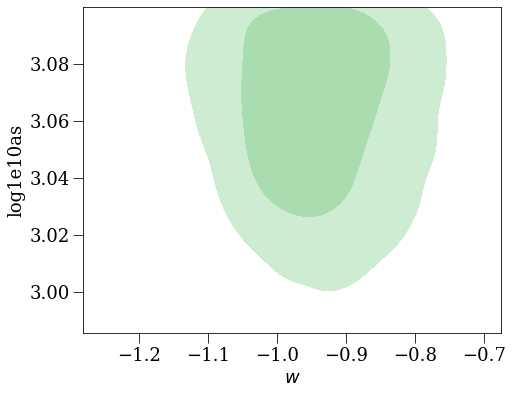

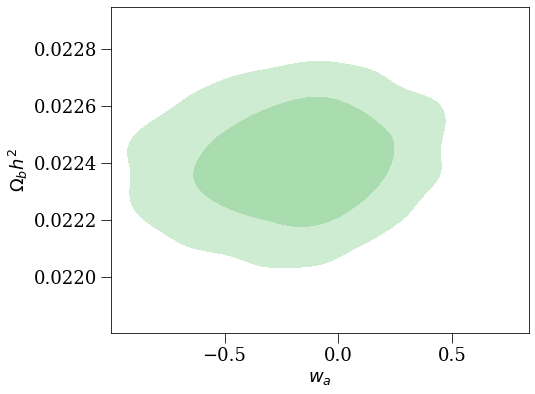

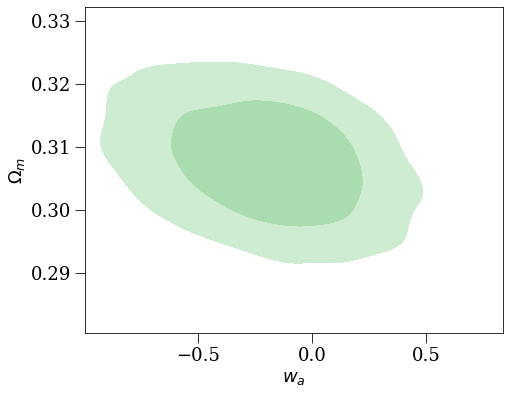

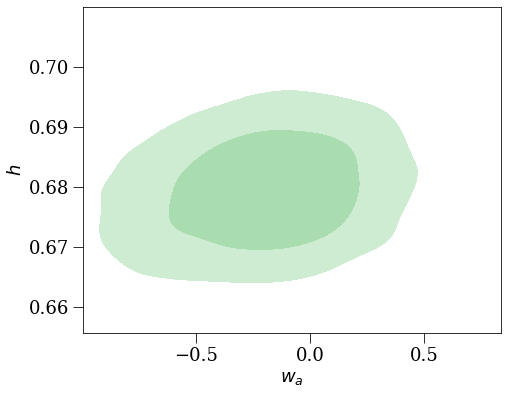

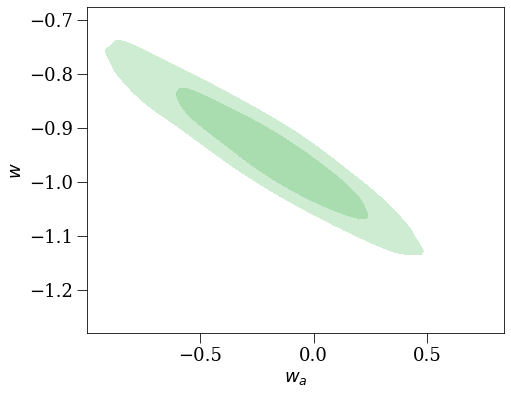

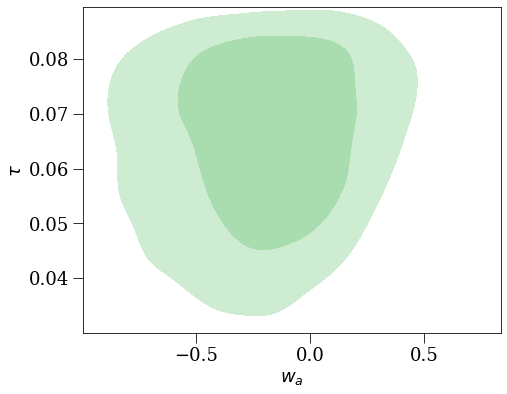

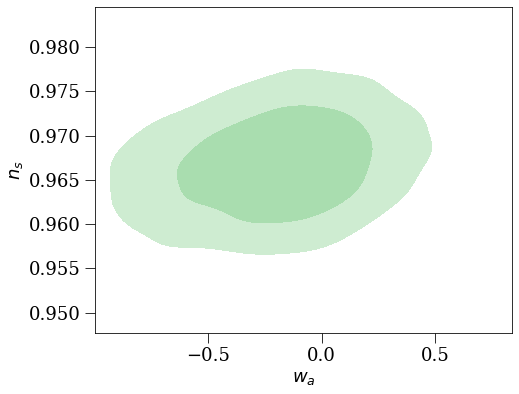

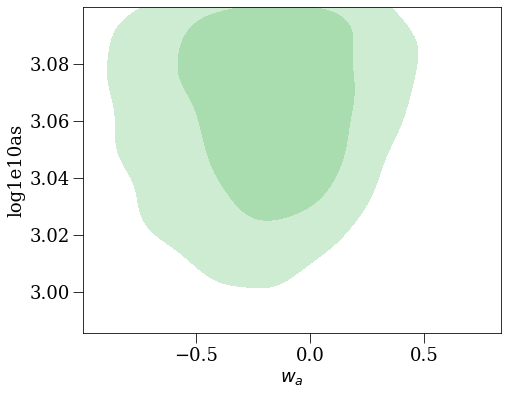

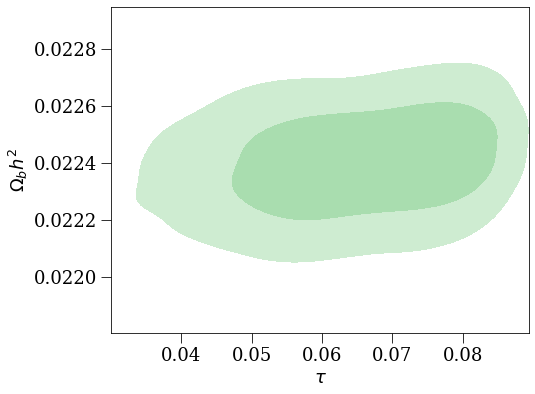

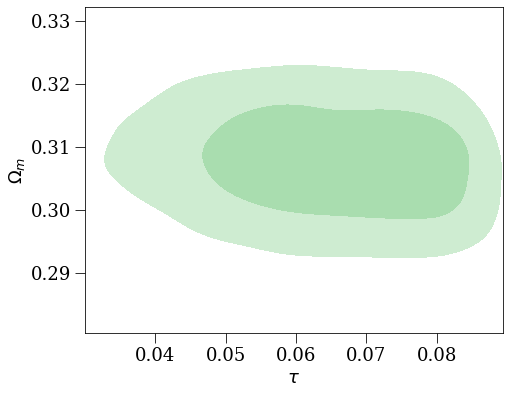

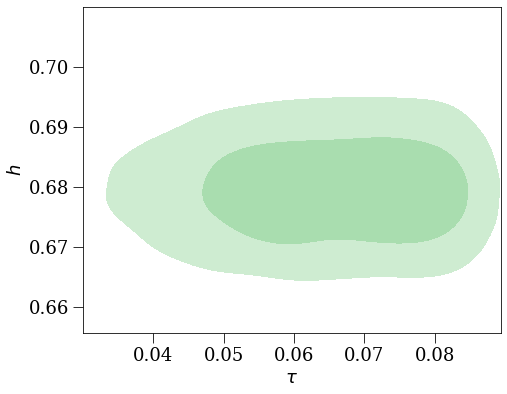

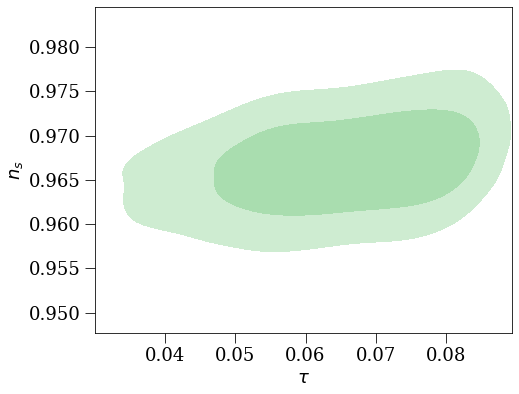

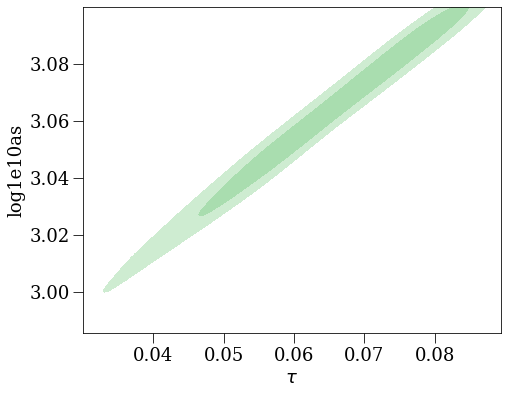

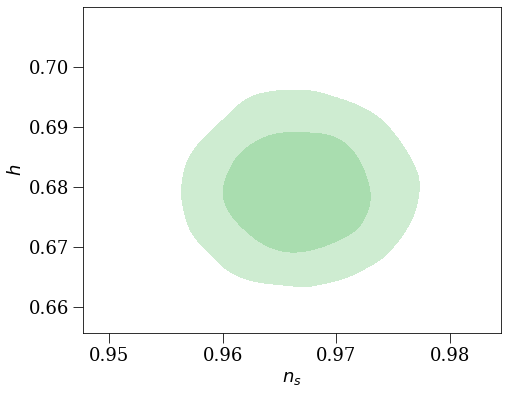

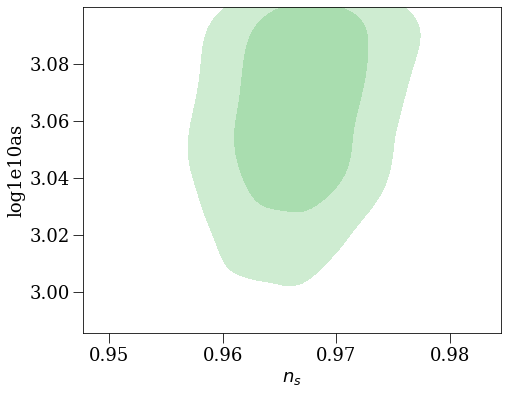

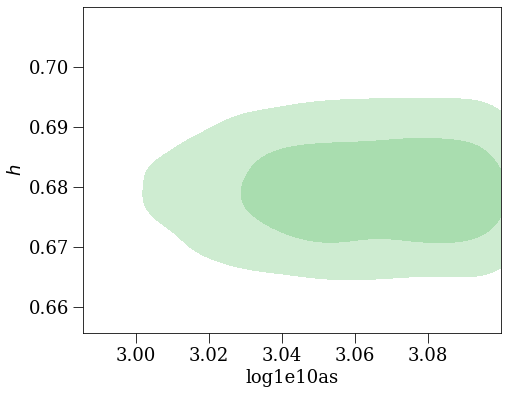

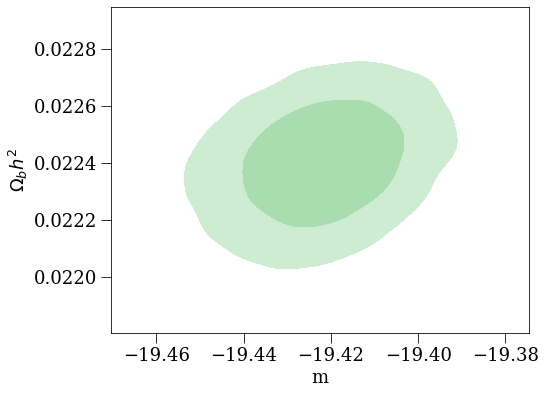

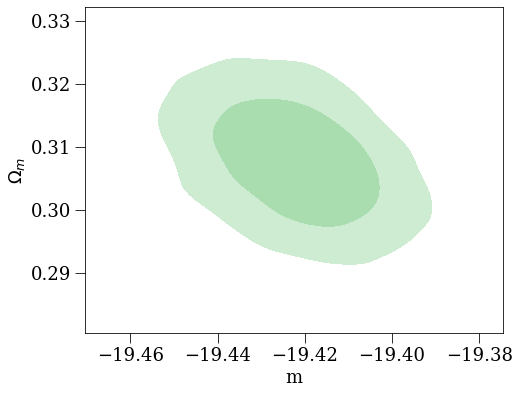

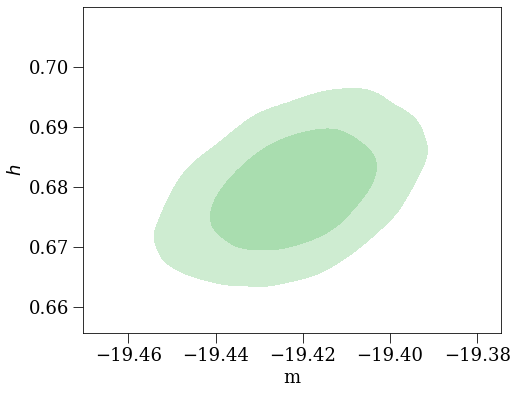

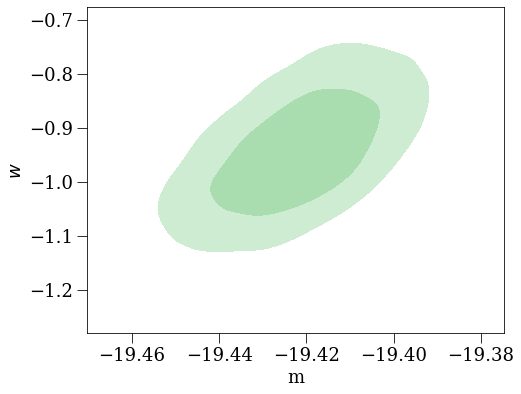

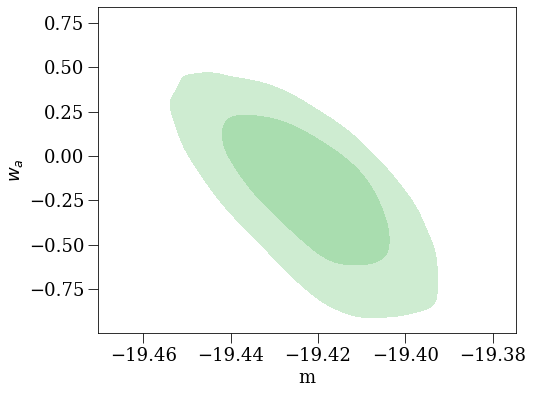

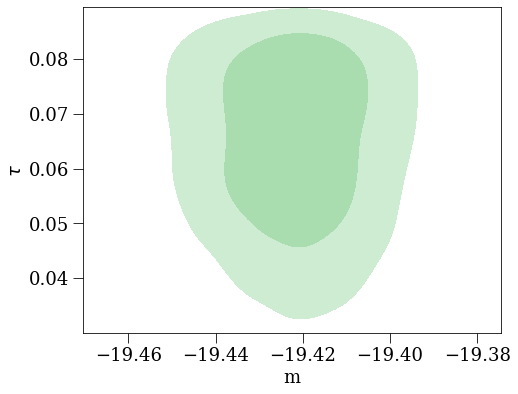

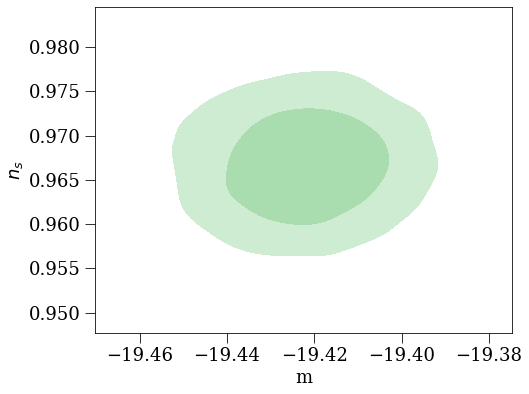

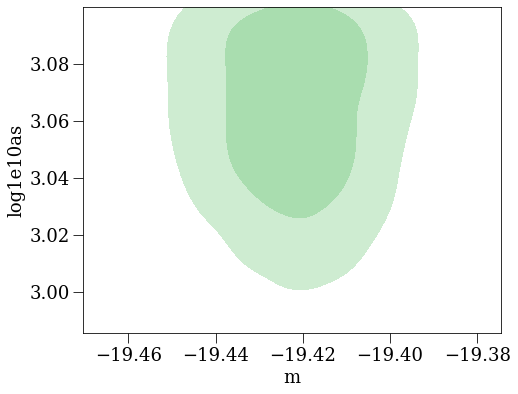

In [66]:
%%timeit 
for p in proc.elements:
    print(p)

proc.run()